Okay, so lets face it - 10 times to submit your validation set to Kaggle isn't all that much - especially if you're more used to working in small iterations, or if you just like to brute force your way through Machine Learning!

The code below is typically a **HUGE NO NO** in the world of Machine Learning.  So don't get used to doing things this way.

*Why?*

Your Testing set and your Training set should always be different data sets.  The point of your classification algorithm is that in the face of new data it should be able to accurately predict the outcome - as long as your classifier is doing it's job. Testing against the same data set you trained on is literally *cheating* in Machine Learning.  Don't get used to it.

That being said - if you must. Here you go.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
train = pd.read_csv("titanic/train.csv")

,Survived
Sex,
female,0.742038
male,0.188908


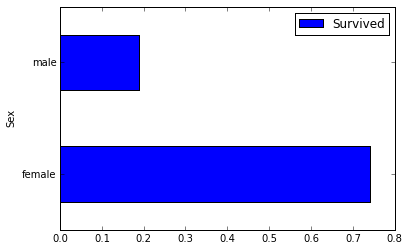

In [5]:
sex_survivor_table = pd.pivot_table(train, index=["Sex"], values=["Survived"])
sex_survivor_table.plot(kind="barh")
sex_survivor_table

## Generating our data with our 'classifier'

In [12]:
fake_testing_data = pd.read_csv("titanic/train.csv")
fake_testing_data['Survived'] = 0
fake_testing_data.loc[fake_testing_data['Sex'] == "female", "Survived"] = 1
fake_testing_data = fake_testing_data[["PassengerId", "Survived"]]
fake_testing_data.set_index("PassengerId").head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


## Narrowing down our training set

In [13]:
train = train[["PassengerId", "Survived"]]
train.set_index("PassengerId").head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


## Merging our training and testing set on the passenger ID

In [19]:
comparison_df = pd.merge(train, fake_testing_data, left_index=True, right_index=True)
comparison_df.columns = ["Training ID", "Training Survival", "Testing Id", "Testing Survival"]

In [27]:
comparison_df.head()

,Training ID,Training Survival,Testing Id,Testing Survival
0,1,0,1,0
1,2,1,2,1
2,3,1,3,1
3,4,1,4,1
4,5,0,5,0


## Querying for rows where the ID's match and the Survival matches

In [28]:
validation_df = comparison_df[
    (comparison_df['Training ID'] == comparison_df['Testing Id']) & \
    (comparison_df['Training Survival'] == comparison_df['Testing Survival'])
]

## Finally getting the accuracy percentage between the two tables

In [33]:
accuracy = validation_df['Training ID'].count() /  comparison_df['Training ID'].count()

In [34]:
accuracy

0.78675645342312006

## Seems decent, well that's because we're cheating like crazy. Stop cheating and do it the right way.